In [ ]:
#!pip install semopy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import semopy

In [19]:
df = pd.read_csv('Test data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   GC      98 non-null     int64
 1   DE1     98 non-null     int64
 2   DE2     98 non-null     int64
 3   DE3     98 non-null     int64
 4   CS1     98 non-null     int64
 5   CS2     98 non-null     int64
 6   CS3     98 non-null     int64
 7   SN1     98 non-null     int64
 8   SN2     98 non-null     int64
 9   SN3     98 non-null     int64
 10  ASP1    98 non-null     int64
 11  ASP2    98 non-null     int64
 12  ASP3    98 non-null     int64
 13  PCE1    98 non-null     int64
 14  PCE2    98 non-null     int64
 15  PCE3    98 non-null     int64
 16  TLP1    98 non-null     int64
 17  TLP2    98 non-null     int64
 18  TLP3    98 non-null     int64
 19  SPPI1   98 non-null     int64
 20  SPPI2   98 non-null     int64
 21  SPPI3   98 non-null     int64
 22  SPPB1   98 non-null     int64
 23  SPPB2   98 non-nu

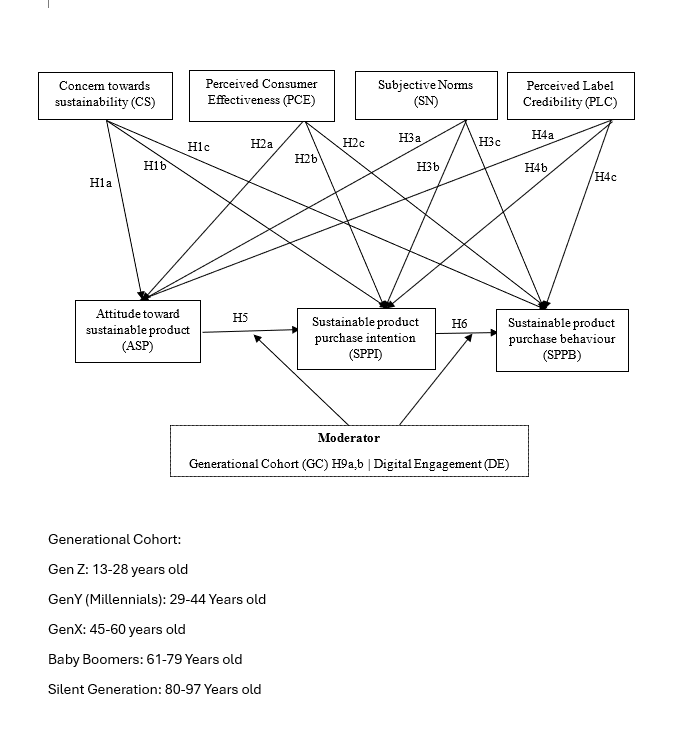

In [27]:
model_spec = """
    # Measurement model
    CS =~ CS1 + CS2 + CS3
    PCE =~ PCE1 + PCE2 + PCE3
    SN =~ SN1 + SN2 + SN3
    TLP =~ TLP1 + TLP2 + TLP3
    ASP =~ ASP1 + ASP2 + ASP3
    SPPI =~ SPPI1 + SPPI2 + SPPI3
    SPPB =~ SPPB1 + SPPB2 + SPPB3
    DE =~ DE1 + DE2 + DE3

    # Regressions
    ASP ~ CS + PCE + SN + TLP
    SPPI ~ CS + PCE + SN + TLP + ASP
    SPPB ~ CS + PCE + SN + TLP + SPPI
    
"""
print(model_spec)


    # Measurement model
    CS =~ CS1 + CS2 + CS3
    PCE =~ PCE1 + PCE2 + PCE3
    SN =~ SN1 + SN2 + SN3
    TLP =~ TLP1 + TLP2 + TLP3
    ASP =~ ASP1 + ASP2 + ASP3
    SPPI =~ SPPI1 + SPPI2 + SPPI3
    SPPB =~ SPPB1 + SPPB2 + SPPB3
    DE =~ DE1 + DE2 + DE3

    # Regressions
    ASP ~ CS + PCE + SN + TLP
    SPPI ~ CS + PCE + SN + TLP + ASP
    SPPB ~ CS + PCE + SN + TLP + SPPI




In [34]:
from semopy import Model
model = Model(model_spec)
model.fit(df)
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,ASP,~,CS,-1.520051,9.785904,-0.155331,0.876561
1,ASP,~,PCE,6.106830,31.464637,0.194086,0.846109
2,ASP,~,SN,0.238681,2.200573,0.108463,0.913628
3,ASP,~,TLP,-0.492587,3.196839,-0.154086,0.877542
4,SPPI,~,CS,-0.257251,0.566596,-0.454029,0.649808
...,...,...,...,...,...,...,...
75,SPPI2,~~,SPPI2,0.491294,0.085064,5.775549,0.0
76,SPPI3,~~,SPPI3,0.439454,0.091413,4.807353,0.000002
77,TLP1,~~,TLP1,0.399148,0.063206,6.315023,0.0
78,TLP2,~~,TLP2,0.635152,0.092177,6.890576,0.0


In [35]:
latent_scores = model.predict_factors(df)
df = pd.concat([df,latent_scores],axis=1)

In [31]:
df['ASP_c'] = df['ASP'] - df['ASP'].mean()
df['SPPI_c'] = df['SPPI'] - df['SPPI'].mean()
df['DE_c'] = df['DE'] - df['DE'].mean()
df['GC_c'] = df['GC'] - df['GC'].mean()

In [32]:
df['ASP_GC'] = df['ASP_c'] * df['GC_c'] 
df['SPPI_DE'] = df['SPPI_c'] * df['DE_c']  

In [33]:
#Model with moderation

moderation_model = """
    SPPI ~ CS + PCE + SN + TLP + ASP_c + GC_c + ASP_GC
    SPPB ~ CS + PCE + SN + TLP + SPPI_c + DE_c + SPPI_DE
    
"""
mod_model = Model(moderation_model)
mod_model.fit(df)
mod_model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,SPPI,~,CS,-0.306727,0.065971,-4.649454,3.328154e-06
1,SPPI,~,PCE,-0.557412,0.210853,-2.643611,8.202696e-03
2,SPPI,~,SN,0.301360,0.022010,13.691642,0.000000e+00
3,SPPI,~,TLP,0.076942,0.020086,3.830557,1.278535e-04
4,SPPI,~,ASP_c,0.666686,0.055282,12.059781,0.000000e+00
5,SPPI,~,GC_c,-0.002290,0.004336,-0.528014,5.974895e-01
6,SPPI,~,ASP_GC,-0.017666,0.026742,-0.660612,5.088610e-01
7,SPPB,~,CS,1.188656,0.231259,5.139928,2.748444e-07
8,SPPB,~,PCE,2.689331,0.659814,4.075892,4.583821e-05
9,SPPB,~,SN,-0.057274,0.105120,-0.544850,5.858569e-01
